In [1]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd
from scipy.integrate import solve_ivp

In [177]:
def grafico(oeste, leste, dados0, dados1, t_pico, list_t, list_R0, R0_f, R0_s, R0_d, x_esq, x_dir, coef_s, coef_d, t_fake):
    
    meio = int((oeste+leste)/2)
    um_quarto = int((oeste+meio)/2)
    tres_quartos = int((meio+leste)/2)

    dados0_y_rio = dados0[nome_cidade][oeste:leste].to_numpy()/população
    dados0_x_rio = dados0.index[oeste:leste].to_numpy()
    
    if dados_limpos == True:
        dados1_y_rio = dados1[nome_cidade][oeste:leste].to_numpy()/população
        dados1_x_rio = dados1.index[oeste:leste].to_numpy()

    fig, ax = plt.subplots(figsize=(15,8))

    ax.scatter(dados0_x_rio, dados0_y_rio, alpha=1, label='Dados limpos')

    ax.plot(res.t, res.y[1], 'r', label='Infectados SIR')
    ax.axvline(t_pico, color='g',label=f"ΔR0; Dia: {dados0.loc[t_pico]['Datas']}")
    ax.axvline(t_fake, color='b',label=f"ΔR0; Dia: {dados0.loc[t_pico]['Datas']}")

    
    if dados_limpos == True:
        ax.plot(dados1_x_rio, dados1_y_rio,'*-r', alpha=0.3, label='Dados coletados')

    ax.grid(True)
    ax.set_ylabel('Densidade populacional')
    ax.set_xlabel('Dias consecutivos')
    ax.legend(frameon=False, loc='upper left')
    label = [dados0.loc[oeste]['Datas'],dados0.loc[um_quarto]['Datas'],dados0.loc[meio]['Datas'],
              dados0.loc[tres_quartos]['Datas'],dados0.loc[leste]['Datas']]
    ax.set_xticks([oeste,um_quarto,meio,tres_quartos,leste], labels=label)

    ax2 = plt.axes([0.65,0.65,0.2,0.2])
    ax2.scatter(list_t, list_R0, alpha=0.1,label='R0')
    ax2.set_ylabel('R0')
    ax2.set_xlabel('Dias')
    ax2.axvline(t_pico, color='g',label='Pico')
    ax2.set_yticks([R0_s, R0_d, R0_f ])
    ax2.legend(frameon=False)



    label2 = [dados0.loc[x_esq]['Datas'],dados0.loc[t_pico]['Datas'],dados0.loc[x_dir]['Datas']]
    ax2.set_xticks([x_esq,t_pico,x_dir], labels=label2)

    ax2.set_xlim([x_esq,x_dir])
    ax.set_xlim([x_esq,x_dir])
    ax.set_title(f'{nome_cidade}; Modelo SIR modificado; R0_f: {round(R0_f,2)}; R0_s: {round(R0_s,2)}; R0_d: {round(R0_d,2)}')
    
    #plt.savefig('/home/isplay/Área de Trabalho/Dados.pdf')

    return

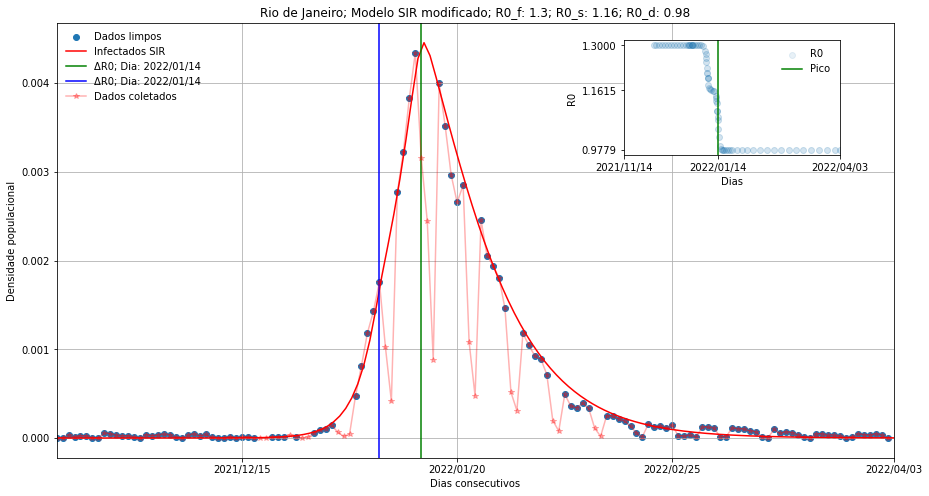

In [178]:
# Rio de Janeiro

# Entrada
url0 = 'https://raw.githubusercontent.com/isplay/projeto_propagacao_epidemias/main/csv_dados_limpos/Rio_de_Janeiro_cidade_limpos.csv'
dados0 = pd.read_csv(url0)
dados_limpos = True
url1 = 'https://raw.githubusercontent.com/isplay/projeto_propagacao_epidemias/main/csv/Rio_de_Janeiro_cidade.csv'
dados1 = pd.read_csv(url1)

# Região
população = 6775561
nome_cidade = 'Rio de Janeiro'

# Intervalo do maior gráfico
oeste = 635
leste = 780

# Intervalo do menor gráfico
x_esq = 640
x_dir = 780


#SIR
def sir(t, y):
    s, i, r = y
        
    R0 = B*np.tanh(t - t_fake) + N - A*np.tanh(t - t_pico) + M - R0_s
    
    dsdt = - R0 * s * i
    didt = R0 * s * i - i
    drdt = i
    list_R0.append(R0)
    list_t.append(t)
    return dsdt, didt, drdt

# Coeficientes coletados
coef_s = 0.1615219031945897
coef_d = -0.10009838636511394

# Função R0(t)
R0_f = 0.3 + 1                    # retirado do fit
R0_s = coef_s + 1
R = 0.88
R0_d = R*1/(1-(-coef_d))          # Pode estar errado????

M = (R0_s+R0_d)/2
N = (R0_s+R0_f)/2
A = R0_s - M
B = R0_s - N
list_R0 = [] 
list_t = []

# Condições iniciais
t0, t = oeste, leste

t_fake = 694
t_pico =  701

i0 = 1e-10
r0 = 0
s0 = 1 - i0 - r0

# Simulando o Modelo SIR
resolucao_curva = np.linspace(t0,t,leste-oeste)
res = solve_ivp(sir, (t0, t), y0=[s0, i0, r0], t_eval=resolucao_curva, method='LSODA')

# Plot
grafico(oeste, leste, dados0, dados1, t_pico, list_t, list_R0, R0_f, R0_s, R0_d, x_esq, x_dir, coef_s, coef_d, t_fake)


# Outros coeficientes que funcionaram:
#coef_s = 0.207
#coef_d = -0.025

array([1.10000025, 1.10000128, 1.10000653, 1.10003343, 1.10017099,
       1.10087296, 1.10441442, 1.12130001, 1.18434433, 1.30004869,
       1.37331518, 1.39438355, 1.3988857 , 1.39978159, 1.39995725,
       1.39999143, 1.39999724, 1.39999391, 1.3999704 , 1.39984886,
       1.39922702, 1.39605481, 1.38008038, 1.30458416, 1.03214721,
       0.56785279, 0.29541584, 0.21991962, 0.20394519, 0.20077298,
       0.20015113, 0.20002953, 0.20000577, 0.20000113, 0.20000022,
       0.20000004, 0.20000001, 0.2       , 0.2       , 0.2       ,
       0.2       , 0.2       , 0.2       , 0.2       , 0.2       ,
       0.2       , 0.2       , 0.2       , 0.2       , 0.2       ])

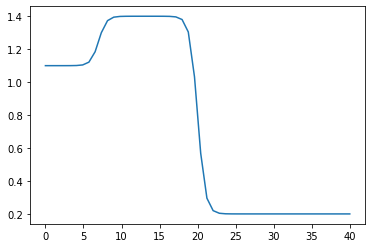

In [179]:
t = np.linspace(0,40)

R0_f = 1.1
R0_s = 1.4
R0_d = 0.2

M = (R0_s+R0_d)/2
N = (R0_s+R0_f)/2
A = R0_s - M
B = R0_s - N

R0 = B*np.tanh(t - 7) + N - A*np.tanh(t - 20) + M - R0_s

plt.plot(t, R0)
R0

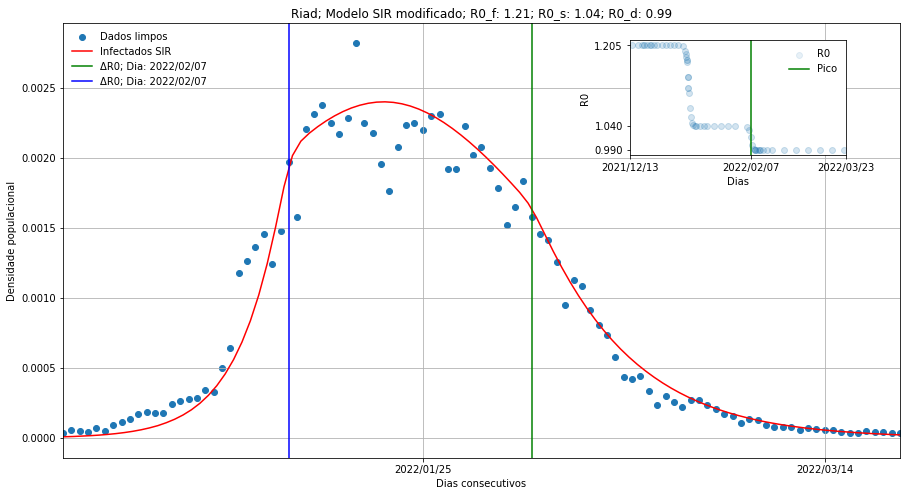

In [180]:
# Riad

# Entrada
dados0 = pd.read_csv('/home/isplay/projeto_propagacao_epidemias/csv/Riad_casos.csv')
dados_limpos = False
dados1 = 0

# Região
população = 7676654 -7000000
nome_cidade = 'Riad'

# Intervalo do maior gráfico
oeste = 586
leste = 780

# Intervalo do menor gráfico
x_esq = 640
x_dir = 740


#SIR
def sir(t, y):
    s, i, r = y
        
    R0 = B*np.tanh((t - t_fake)) + N - A*np.tanh((t - t_pico)) + M - R0_s
    
    dsdt = - R0 * s * i
    didt = R0 * s * i - i
    drdt = i
    list_R0.append(R0)
    list_t.append(t)
    return dsdt, didt, drdt

# Coeficientes coletados
coef_s = 0.2
coef_d = -0.2

# Função R0(t)
R0_f = 1.205
R0_s = 1.04
R0_d = 0.99

#R = 0.88
#R*1/(1-(-coef_d))

M = (R0_s+R0_d)/2
N = (R0_s+R0_f)/2
A = R0_s - M
B = R0_s - N
list_R0 = [] 
list_t = []

# Condições iniciais
t0, t = oeste, leste

t_fake = 667
t_pico =  696

i0 = 1e-10
r0 = 0
s0 = 1 - i0 - r0

# Simulando o Modelo SIR
resolucao_curva = np.linspace(t0,t,leste-oeste)
res = solve_ivp(sir, (t0, t), y0=[s0, i0, r0], t_eval=resolucao_curva, method='LSODA')

# Plot
grafico(oeste, leste, dados0, dados1, t_pico, list_t, list_R0, R0_f, R0_s, R0_d, x_esq, x_dir, coef_s, coef_d, t_fake)


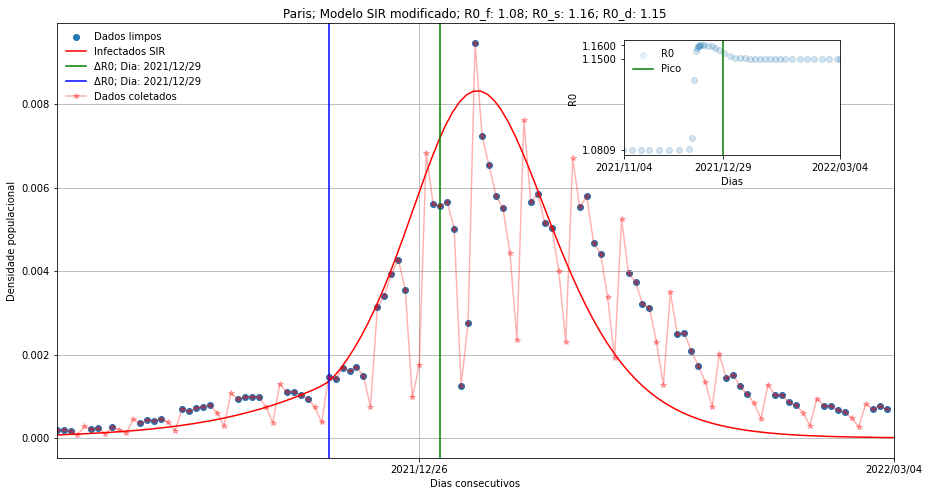

In [299]:
# Paris

# Entrada
url0 = 'https://raw.githubusercontent.com/isplay/projeto_propagacao_epidemias/main/csv_dados_limpos/Paris_casos_limpos.csv'
dados0 = pd.read_csv(url0)
dados_limpos = True
url1 = 'https://raw.githubusercontent.com/isplay/projeto_propagacao_epidemias/main/csv/Paris_casos.csv'
dados1 = pd.read_csv(url1)

# Região
população = 2148271
nome_cidade = 'Paris'

# Intervalo do maior gráfico
oeste = 389
leste = 660

# Intervalo do menor gráfico
x_esq = 540
x_dir = 660


#SIR
def sir(t, y):
    s, i, r = y
        
    R0 = B*np.tanh((t - t_fake)) + N - A*np.tanh(0.2*(t - t_pico)) + M - R0_s
    
    dsdt = - R0 * s * i
    didt = R0 * s * i - i
    drdt = i
    list_R0.append(R0)
    list_t.append(t)
    return dsdt, didt, drdt

# Coeficientes coletados
coef_s = 0.08090757480294411
coef_d = -0.059127473095335725

# Função R0(t)
R0_f = 1 + coef_s
R0_s = 1.16
R0_d = 1.15

#R = 0.88
#R*1/(1-(-coef_d))

M = (R0_s+R0_d)/2
N = (R0_s+R0_f)/2
A = R0_s - M
B = R0_s - N
list_R0 = [] 
list_t = []

# Condições iniciais
t0, t = oeste, leste

t_fake = 579
t_pico =  595

i0 = 1e-10
r0 = 0
s0 = 1 - i0 - r0

# Simulando o Modelo SIR
resolucao_curva = np.linspace(t0,t,leste-oeste)
res = solve_ivp(sir, (t0, t), y0=[s0, i0, r0], t_eval=resolucao_curva, method='LSODA')

# Plot
grafico(oeste, leste, dados0, dados1, t_pico, list_t, list_R0, R0_f, R0_s, R0_d, x_esq, x_dir, coef_s, coef_d, t_fake)